<a href="https://colab.research.google.com/github/Mehul-Agrawal410/SoC-2k22/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing numpy, pandas and the csv file as df

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
ct=pd.read_csv('gdrive/madfhantr.csv')

In [ ]:
ct.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
ct.shape

(614, 13)

###Filling NaNs and label encoding

In [ ]:
label_enc = preprocessing.LabelEncoder()

In [ ]:
ct.Gender.fillna(ct.Gender.mode()[0], inplace=True)
ct.Gender = label_enc.fit_transform(ct.Gender) #male 1, female 0

In [ ]:
ct.Married.fillna(ct.Married.mode()[0],inplace=True)
ct.Married = label_enc.fit_transform(ct.Married) #yes 1, no 0

In [ ]:
ct.loc[ct.Dependents=='3+','Dependents'] = '4'
ct.Dependents = ct.Dependents.astype('float64')
ct.Dependents.fillna(ct.Dependents.mean(),inplace=True)

In [ ]:
ct.Education = label_enc.fit_transform(ct.Education) #graduate 0, non graduate 1

In [ ]:
ct.Self_Employed.fillna(ct.Self_Employed.mode()[0],inplace=True)
ct.Self_Employed = label_enc.fit_transform(ct.Self_Employed) #yes 1, no 0

In [ ]:
ct.LoanAmount.fillna(int(ct.LoanAmount.mean()),inplace=True)

In [ ]:
ct.Loan_Amount_Term.fillna(ct.Loan_Amount_Term.mode()[0],inplace=True)

In [ ]:
ct.Property_Area = label_enc.fit_transform(ct.Property_Area) #urban 2,rural 0, semiurban 1

In [ ]:
ct.Loan_Status = label_enc.fit_transform(ct.Loan_Status) #Y 1, N 0

In [ ]:
ct.Credit_History.fillna(ct.Credit_History.mode()[0],inplace=True)

In [ ]:
ct.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


##Removing outliers

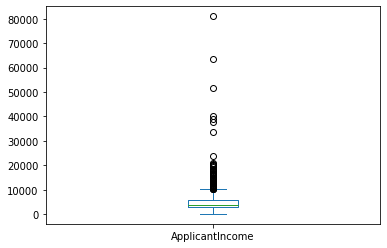

In [ ]:
ct.ApplicantIncome.plot(kind='box')

In [ ]:
app = ct[ct.ApplicantIncome > 30000].index.values.astype('int')
ct.drop(app,inplace = True)

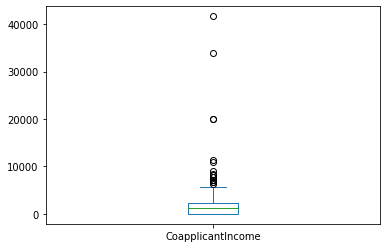

In [ ]:
ct.CoapplicantIncome.plot(kind = 'box')

In [ ]:
coap = ct[ct.CoapplicantIncome > 15000].index.values.astype('int')
ct.drop(coap,inplace = True)

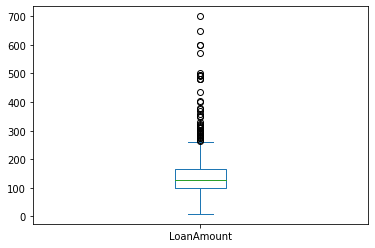

In [ ]:
ct.LoanAmount.plot(kind='box')

In [ ]:
ct.shape

(603, 13)

###Splitting dataset

In [ ]:
X = ct.iloc[:,1:12]
y = ct.iloc[:,12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

###Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier:  0.7081081081081081


###Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy of Gaussian Naive Bayes: ", accuracy_score(y_test, gnb_pred))

Accuracy of Gaussian Naive Bayes:  0.7837837837837838


##Logistic Regression


In [ ]:
lr = linear_model.LogisticRegressionCV()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Accuracy of Logistic regression: ", accuracy_score(y_test, lr_pred))

Accuracy of Logistic regression:  0.7891891891891892
